In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
def get_image_pair(path):
  img1 = cv2.imread(f'./img/{path}', 0)

  img2 = img1.copy()
  img2 = cv2.blur(img2, (5, 5))
  num_rows, num_cols = img2.shape[:2]
  rotation_matrix = cv2.getRotationMatrix2D((num_cols / 2, num_rows / 2), 160, 1)

  img2 = cv2.warpAffine(img2, rotation_matrix, (num_cols, num_rows))

  return img1, img2

In [28]:
def apply_brick(img1, img2): 
  brick = cv2.BRISK_create()

  keypoints1, descriptors1 = brick.detectAndCompute(img1, None)
  keypoints2, descriptors2 = brick.detectAndCompute(img2, None)

  return keypoints1, descriptors1, keypoints2, descriptors2

In [29]:
def plot_images(img1, img2):
  _, ax = plt.subplots(1, 2, figsize=(20,10))
  ax[0].set_title("Original Image")
  ax[0].imshow(img1, cmap='gray')
  ax[1].set_title("Converted Image")
  ax[1].imshow(img2, cmap='gray')

In [30]:
def bf_matcher(img1, kp1, ds1, img2, kp2, ds2):
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

  matches = bf.match(ds1, ds2)
  matches = sorted(matches, key = lambda x : x.distance)

  draw_matches(img1, kp1, img2, kp2, matches)

In [31]:
def draw_matches(img1, kp1, img2, kp2, matches):
  matches_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, 
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  
  plt.figure(figsize=(20,40))
  plt.imshow(matches_img)

In [32]:
def matcher(img1, kp1, ds1, img2, kp2, ds2, ):
    matches = []
    for i, k1 in enumerate(ds1):
        for j, k2 in enumerate(ds2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
   
    matches = sorted(matches, key = lambda x : x.distance)

    draw_matches(img1, kp1, img2, kp2, matches)

In [33]:
img1, img2 = get_image_pair('volvo.jpeg')

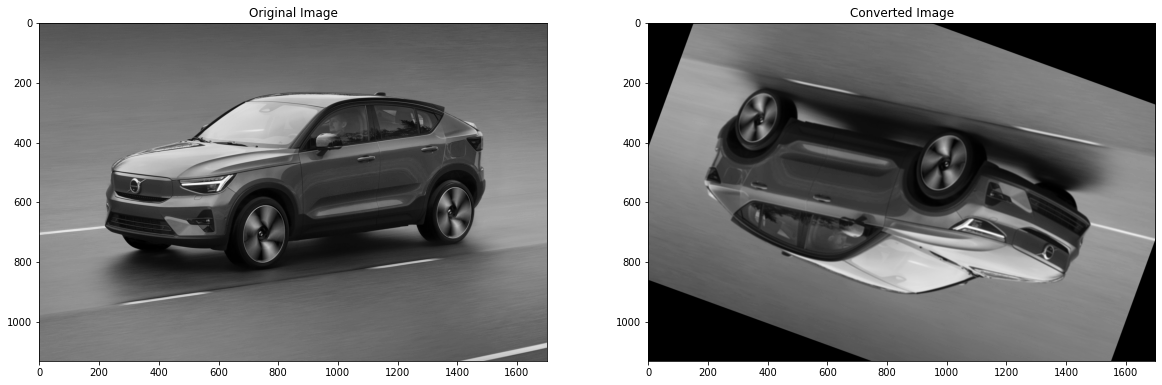

In [34]:
plot_images(img1, img2)

In [35]:
kp1, ds1, kp2, ds2 = apply_brick(img1, img2)

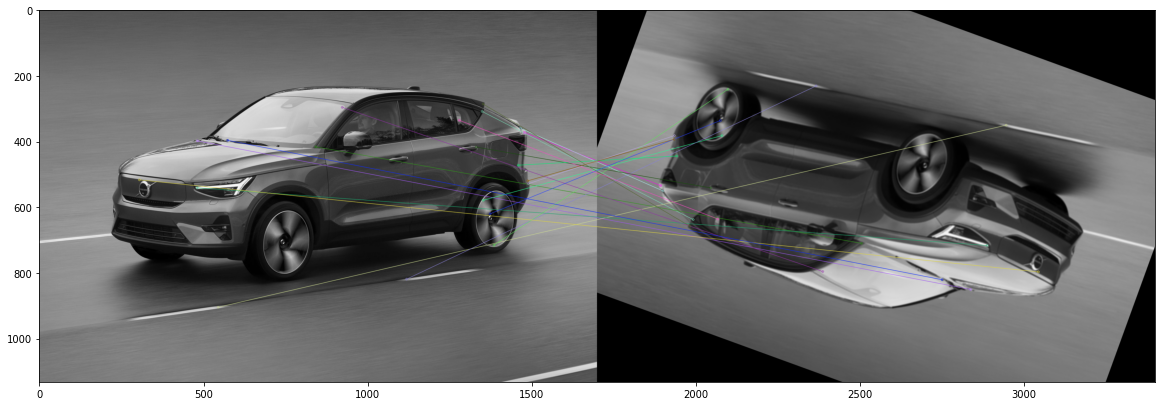

In [36]:
bf_matcher(img1, kp1, ds1, img2, kp2, ds2)

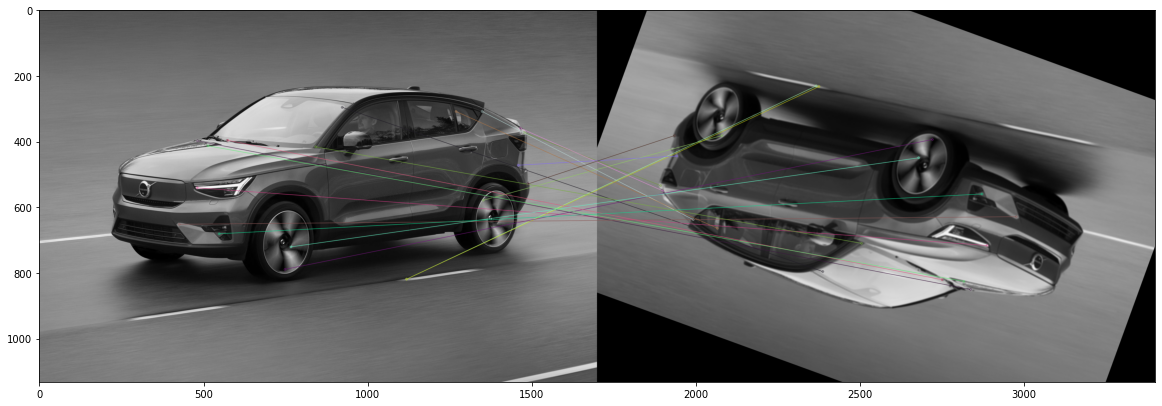

In [37]:
matcher(img1, kp1, ds1, img2, kp2, ds2)

In [38]:
img3, img4 = get_image_pair('mario.png')

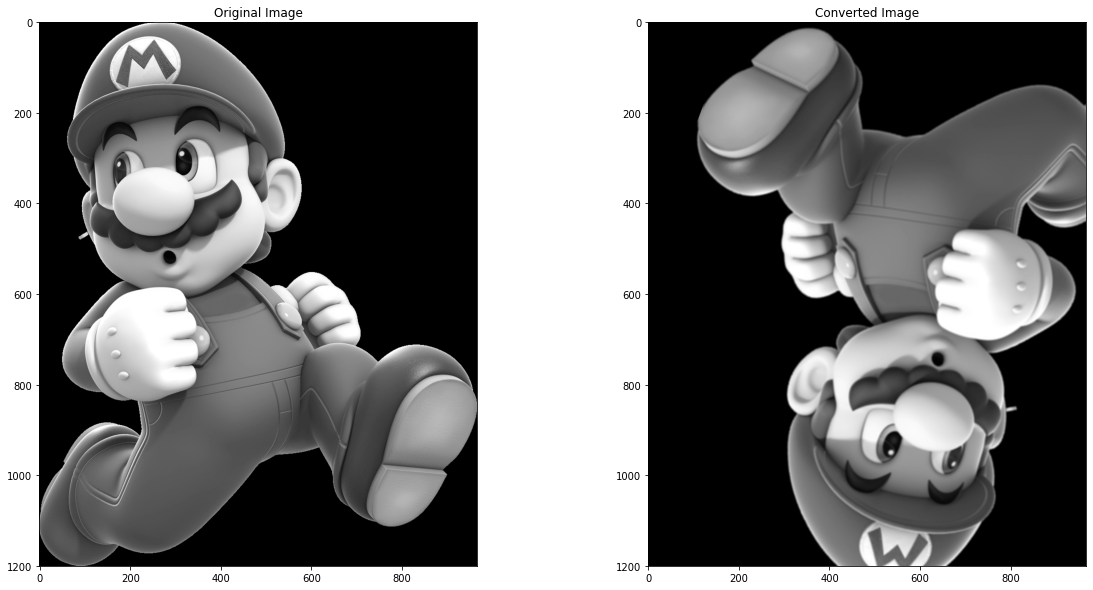

In [39]:
plot_images(img3, img4)

In [40]:
kp3, ds3, kp4, ds4 = apply_brick(img3, img4)

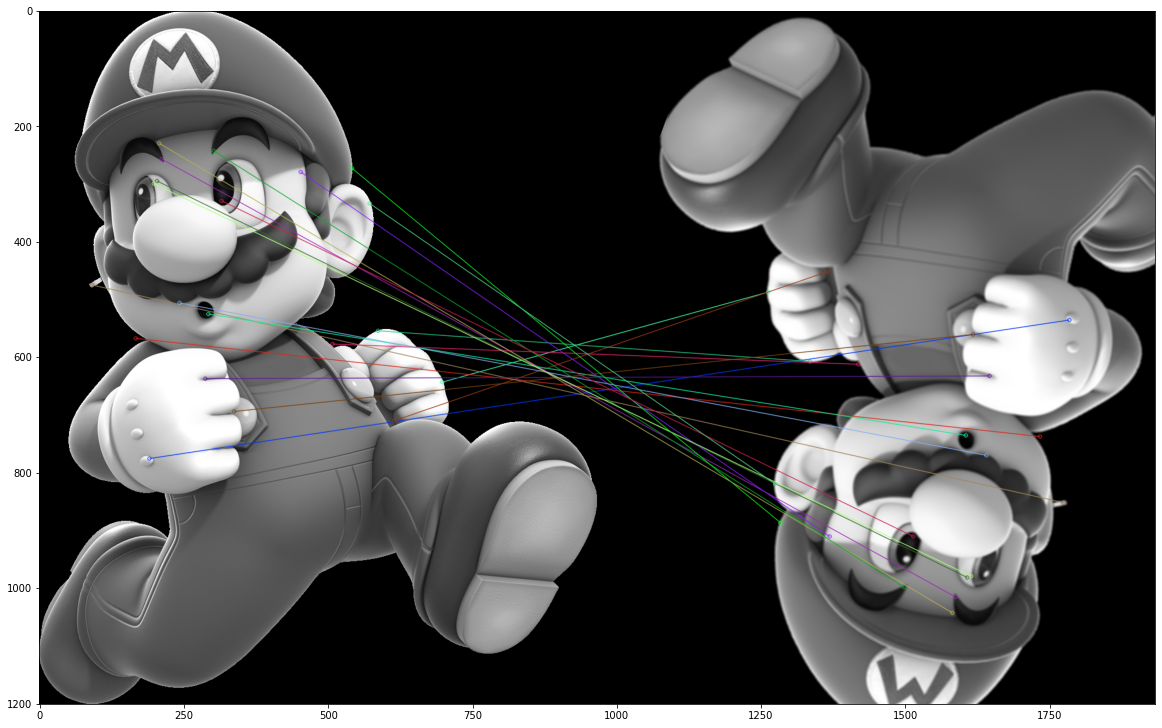

In [41]:
bf_matcher(img3, kp3, ds3, img4, kp4, ds4)

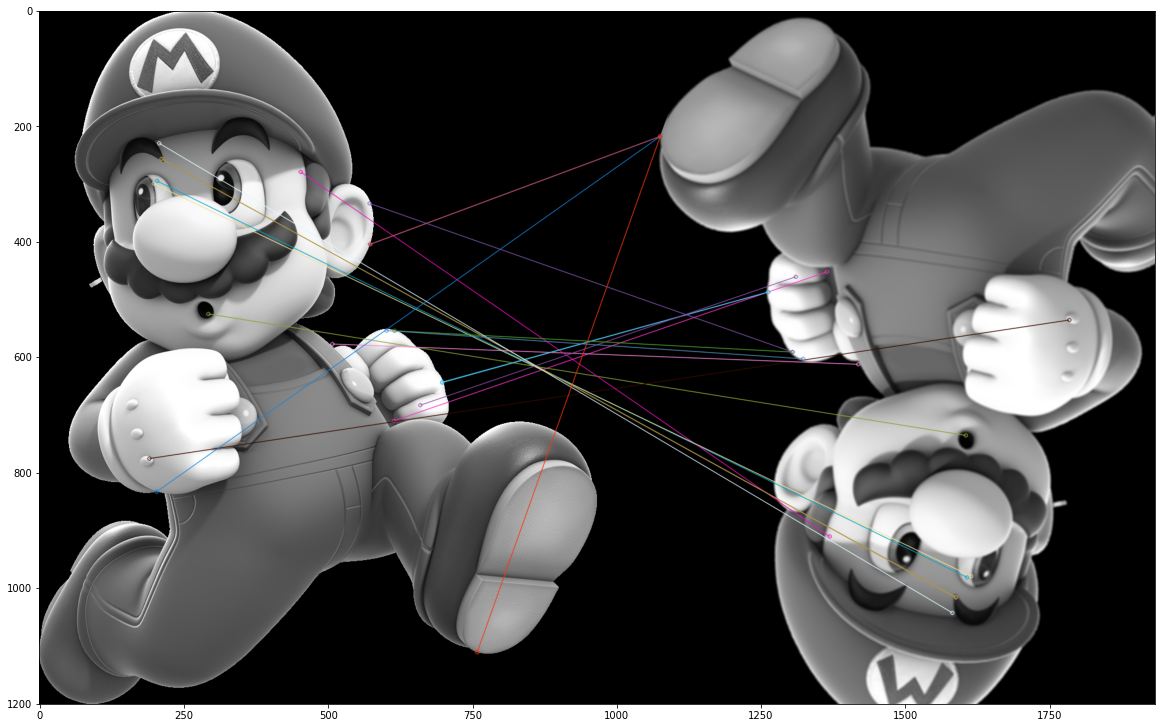

In [42]:
matcher(img3, kp3, ds3, img4, kp4, ds4)